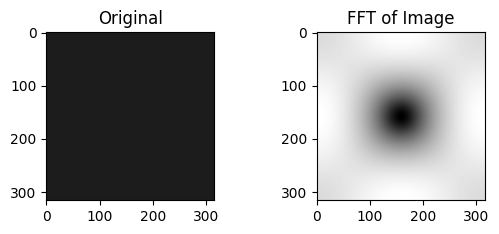

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from PIL import Image
import cv2

from util_save_img import save_img

def plot(data, title, is_fft=False):
    plot.i += 1
    plt.subplot(2, 2, plot.i)
    if is_fft:
        # Compute the magnitude spectrum and use a logarithmic scale
        data = np.abs(data)
        data = np.fft.fftshift(data)  # Shift the zero frequency components to the center of the spectrum
        data = np.log1p(data)  # Use log scale for better visibility
    plt.imshow(data, cmap='gray')
    plt.title(title)
plot.i = 0

# Load the image and convert to grayscale
im = Image.open('imgs/Lenna.jpg')
if im.mode != 'L':
    im = im.convert('L')
data = np.array(im, dtype=float)

# Define a highpass filter kernel
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Pad the kernel to the size of the image and shift the kernel center to the center of the image
kernel_padded = np.zeros_like(data)
kernel_center = tuple(np.array(kernel_padded.shape) // 2 - np.array(kernel.shape) // 2)
kernel_padded[kernel_center[0]:kernel_center[0]+kernel.shape[0], kernel_center[1]:kernel_center[1]+kernel.shape[1]] = kernel
kernel_shifted = np.fft.fftshift(kernel_padded)
plot(kernel_padded, 'Original')

# Perform FFT on the image
fft_img = np.fft.fft2(kernel_padded)

# Plot the FFT image
plot(fft_img, 'FFT of Image', is_fft=True)

# cv2.imwrite('imgs/fft_img.jpg', np.abs(fft_img))
# cv2.imwrite('output/fft_high_pass_filter.png', np.abs(fft_img))
# cv2.imwrite('output/fft_high_pass_filter.png', fft_img)

save_img(fft_img, 'output/fft_high_pass_filter.png', True)
plt.show()
